In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

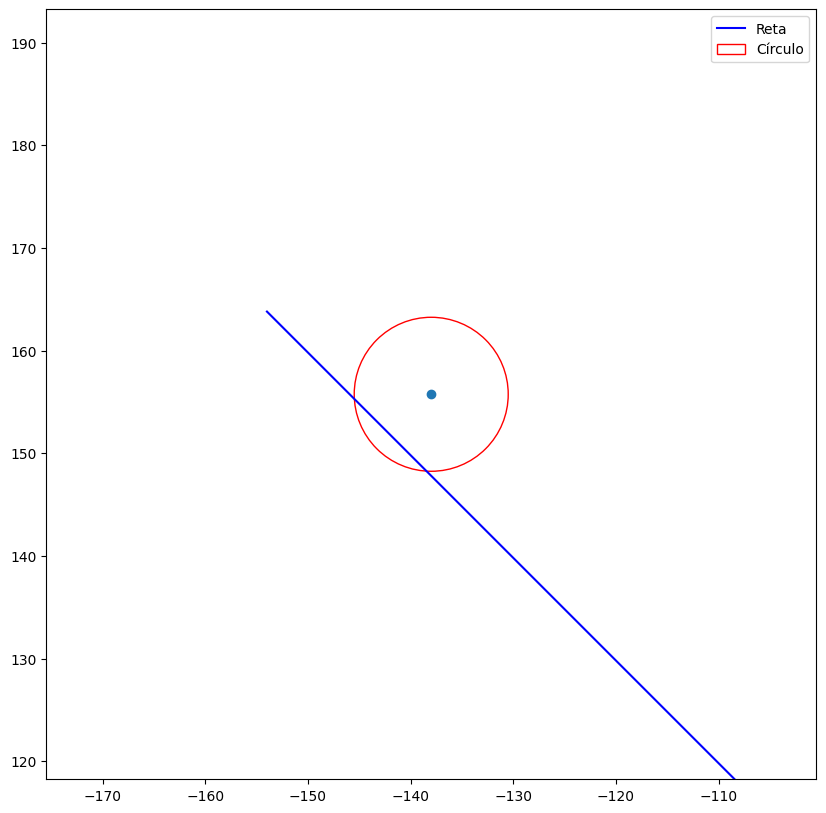

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Pontos inicial e final da reta
ponto_inicial = (0,9.8)
ponto_final = (-154.000000,163.800000)

# Centro e raio do círculo
centro_do_circulo = (-138.000000,155.743946)
raio_do_circulo = 7.5
# Criar a figura e os eixos
fig, ax = plt.subplots(figsize=(10, 10))

# Desenhar a reta
reta_x = [ponto_inicial[0], ponto_final[0]]
reta_y = [ponto_inicial[1], ponto_final[1]]
ax.plot(reta_x, reta_y, color='blue', label='Reta')
plt.scatter(centro_do_circulo[0],centro_do_circulo[1])
# Desenhar o círculo
circulo = plt.Circle(centro_do_circulo, raio_do_circulo, color='red', fill=False, label='Círculo')
ax.add_artist(circulo)

# Configurar os limites dos eixos
limite_x = [min(ponto_inicial[0], ponto_final[0]) - raio_do_circulo, max(ponto_inicial[0], ponto_final[0]) + raio_do_circulo]
limite_y = [min(ponto_inicial[1], ponto_final[1]) - raio_do_circulo, max(ponto_inicial[1], ponto_final[1]) + raio_do_circulo]
ax.set_xlim(centro_do_circulo[0]- 5*raio_do_circulo,centro_do_circulo[0] + 5*raio_do_circulo)
ax.set_ylim(centro_do_circulo[1]- 5*raio_do_circulo,centro_do_circulo[1] + 5*raio_do_circulo)

# Adicionar grade e legenda
ax.legend()

# Mostrar a visualização
plt.gca().set_aspect('equal', adjustable='box')  # Assegurar proporção de aspecto igual
plt.show()


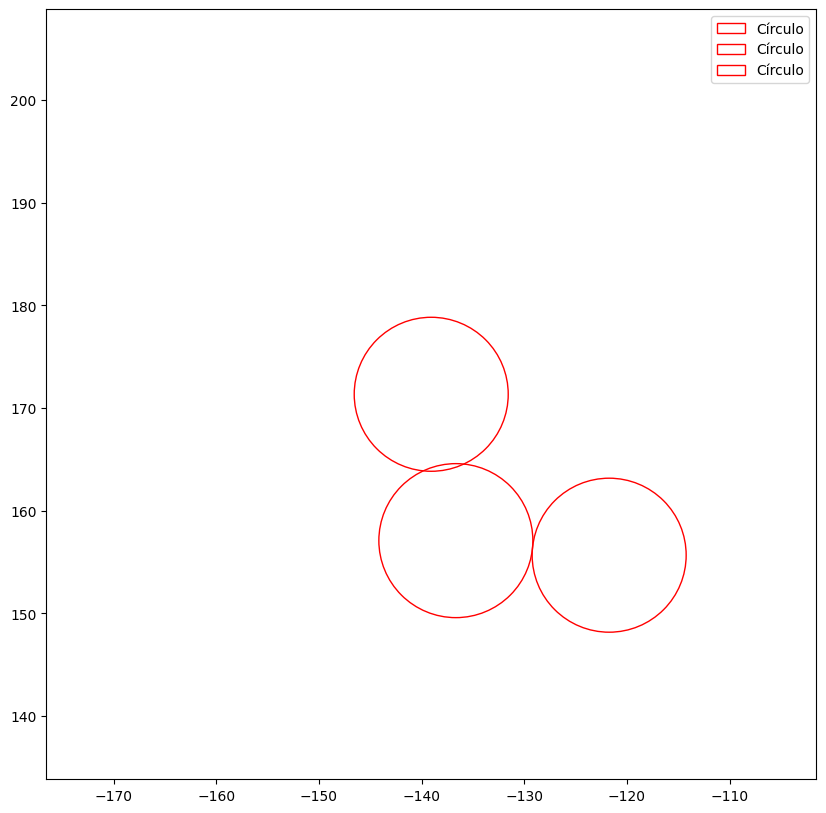

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))

centro_do_circulo = (-136.655359,157.088587)
raio_do_circulo = 7.5

circulo = plt.Circle(centro_do_circulo, raio_do_circulo, color='red', fill=False, label='Círculo')
ax.add_artist(circulo)

centro_do_circulo = (-121.722580,155.670098)
raio_do_circulo = 7.5

circulo = plt.Circle(centro_do_circulo, raio_do_circulo, color='red', fill=False, label='Círculo')
ax.add_artist(circulo)

centro_do_circulo = (-139.054765,171.344140)
raio_do_circulo = 7.5

circulo = plt.Circle(centro_do_circulo, raio_do_circulo, color='red', fill=False, label='Círculo')
ax.add_artist(circulo)

# Configurar os limites dos eixos
ax.set_xlim(centro_do_circulo[0]- 5*raio_do_circulo,centro_do_circulo[0] + 5*raio_do_circulo)
ax.set_ylim(centro_do_circulo[1]- 5*raio_do_circulo,centro_do_circulo[1] + 5*raio_do_circulo)

# Adicionar grade e legenda
ax.legend()

# Mostrar a visualização
plt.gca().set_aspect('equal', adjustable='box')  # Assegurar proporção de aspecto igual
plt.show()

In [5]:
-138.000000*0 + 105.944552*-1+98.711941

-7.232611000000006

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import imageio.v2 as imageio  # Importando a versão 2 especificamente
from tqdm import tqdm

# Carregar dados do arquivo TXT
data = np.loadtxt("./example.txt").T
df = {
    'Tempo': data[0],
    "id": data[1].astype(int),
    "x": data[2],
    "y": data[3],
}
dados = pd.DataFrame(df)
# Configurações iniciais do plot
fig, ax = plt.subplots()
ax.set_xlim(-304,304)
ax.set_ylim(0, 910)

# Lista para armazenar os frames
filenames = []
dt = 0.25/2
t = 0
count = 0
angulo = 45
while(t < dados["Tempo"].max()):
    ax.clear()
    ax.set_xlim(-324,324)
    ax.set_ylim(0, 910)

    ax.plot([0,0],[0,9.8], color='blue')
    ax.plot([150,150],[0,9.8], color='blue')

    ax.plot([0,-154],[9.8,9.8 + 154*np.tan(np.pi*angulo/180)], color='blue')
    ax.plot([150,304],[9.8,9.8 + 154*np.tan(np.pi*angulo/180)], color='blue')
    ax.plot([-154,-154],[9.8 + 154*np.tan(np.pi*angulo/180),910], color='blue')
    ax.plot([304,304],[9.8 + 154*np.tan(np.pi*angulo/180),910], color='blue')

    data_int_time = dados[dados["Tempo"] == t]
    for particula in data_int_time[["x",'y']].values:
        if(particula[1] > 0):
            ax.scatter(particula[0], particula[1], color='red')  # Destaca a posição atual
    
    # Salvar o frame
    #ax.text(0.05, 0.95, f'Time: {current_time:.2f}', transform=ax.transAxes, fontsize=12,verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    filename = f'./frames/frame_{count}.png'
    plt.gca().set_aspect('equal', adjustable='box')  # Assegurar proporção de aspecto igual
    plt.savefig(filename)
    filenames.append(filename)

    t += dt
    count += 1

# Criar GIF
with imageio.get_writer('./frames/particula_movimento.gif', mode='I', duration=0.05) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
        # Remover os arquivos de frame para limpeza
        os.remove(filename)

plt.close()


  0%|          | 0/101 [00:00<?, ?it/s]

100%|██████████| 101/101 [00:11<00:00,  9.05it/s]
